In [3]:
import torch 

d_ = torch.load('/home/samuelboehm/EEG-GAN/datasets/clinical/S1.pt')
d_ = d_.datasets[0][0][0]
d_.shape

(21, 644)

In [1]:
from braindecode.datasets.base import BaseConcatDataset
from braindecode.preprocessing import preprocess, Preprocessor
import numpy as np

import mne
mne.set_log_level('ERROR')


def change_type(X: np.ndarray, out_type: str) -> np.ndarray:
    # MNE expects the data to be of type float64. This helper function changes the type of the input data to float64.
    if out_type == 'float64':
        return X.astype('float64')
    elif out_type == 'float32':
        return X.astype('float32')
    else:
        raise ValueError(f"Unknown type {out_type}")


<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
2024-04-19 16:34:02.773764: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 16:34:02.987825: E external/local_xla/

In [4]:
from mne.filter import resample

d_ = torch.Tensor(d_)

down = resample(d_, 8, 256)


TypeError: Data to be resampled must be an instance of ndarray, list, or tuple, got <class 'torch.Tensor'> instead.

In [119]:
import torch.nn as nn
label_embedding = nn.Embedding(2, 644)

y = torch.Tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1]).long()

emb = label_embedding(y).view(y.shape[0], 1, 644)

In [113]:
def resample(X:torch.Tensor, factor:int):
    """
    Downscale input. Using bicubic interpolation.

    Parameters
    ----------
    X : tensor
        Input data
    factor : int
        Factor to downscale the data
    Returns
    -------
    X : tensor
        Downsampled data
    """

    
    size = (X.shape[-2], int(X.shape[-1] // factor))

    print(size)
    print('x shape', X.shape)

    X = nn.functional.interpolate(X, size=size, mode='bicubic')

    return X

torch.Size([256, 3])


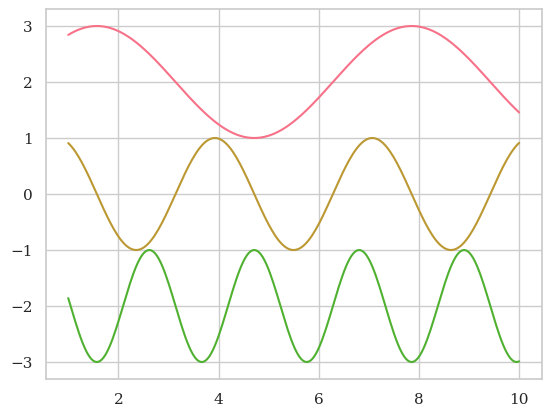

In [114]:
import matplotlib.pyplot as plt

x = torch.linspace(1, 10, 256)

y = torch.stack([torch.sin(x) + 2, torch.sin(2*x), torch.sin(3*x)-2], dim=1)
print(y.shape)

plt.plot(x, y)

In [115]:
y = y.T
y = y.unsqueeze(0).unsqueeze(0)


torch.Size([1, 1, 3, 256])
(3, 512)
x shape torch.Size([1, 1, 3, 256])


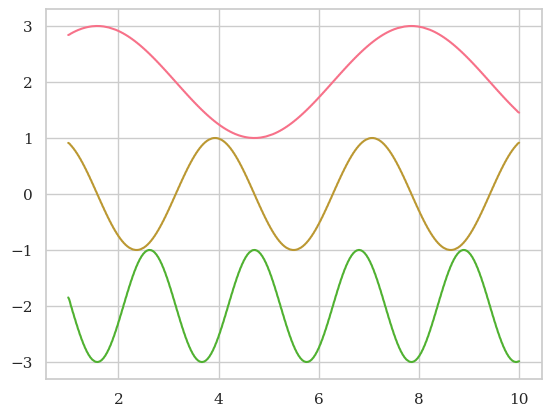

In [116]:


print(y.shape)

factor = .5
y_down = downsample(y, factor)
plt.plot(torch.linspace(1, 10, int(256//factor)), y_down[0, 0, :].T)

(8, 21, 640)

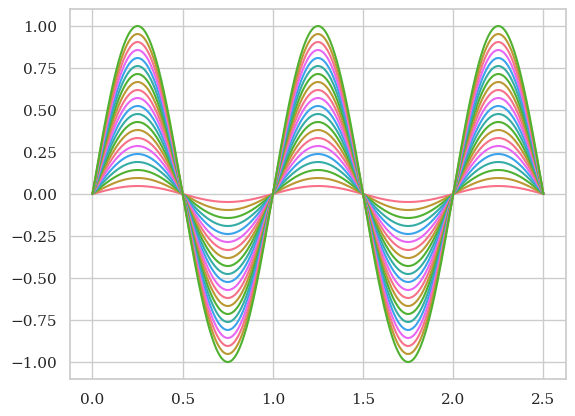

In [55]:
import numpy as np
import matplotlib.pyplot as plt
sfreq = 256
time = 2.5
n_samples = int(sfreq * time)
n_channels = 21
n_classes = 2
batch_size = 8

time = np.linspace(0, time, n_samples)
# extend to batch size
time = np.tile(time, (n_channels, 1))
# create a batch of sines
data = np.sin(2 * np.pi * time)
# amplitudes: 
amplitudes = np.arange(1, n_channels + 1) / n_channels

# Scale the data
data *= amplitudes[:, None]

plt.plot(time[0], data.T)

# extend to batch size
data = np.tile(data, (batch_size, 1, 1))
data.shape


In [36]:
from braindecode.datasets import create_from_X_y
from braindecode.datasets.base import BaseConcatDataset

windows_dataset = create_from_X_y(data, amplitudes, drop_last_window=False, sfreq=sfreq)

ds = BaseConcatDataset([windows_dataset])


Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.
Creating RawArray with float64 data, n_channels=21, n_times=640
    Range : 0 ... 639 =      0.000 ...     2.496 secs
Ready.


In [51]:
from braindecode.preprocessing import preprocess, Preprocessor

preprocessors=[Preprocessor('resample', sfreq=64, npad=0)]

processed = preprocess(ds, preprocessors, n_jobs=-1)

In [54]:
ds.datasets[0][0][0].shape

(21, 160)

In [4]:
class A:
    def __init__(self, a, **kwargs):
        self.a = a

class B(A):
    def __init__(self, b, **kwargs):
        super().__init__(**kwargs)
        self.b = b
        print(self.a)

In [5]:
test = B(a=1, b=2)

1


In [1]:
from src.models.components.generators.baseline import Generator

In [2]:
gen = Generator(n_classes=2, latent_dim=50, embedding_dim=200, freeze=True, fading=True, n_filter=100, n_samples=20, n_stages=5, n_channels=21, current_stage=1)

ValueError: in_channels must be divisible by groups